<span style="color:#04c921; font-size:24px; font-weight:700"> Logistic regression - Exercises</span>

Loans data captured information on loan repayment by individuals. We have 13 independent variables and 1 dependent variable called not.fully.paid. Build a logistic regreession model to predict if an individual is a loan defaulter or not. 

Load the loans dataset:

In [22]:
# load the loans dataset
loans_data = read.csv("/dsa/data/all_datasets/loans/loans.csv")

In [23]:
str(loans_data)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : chr  "debt_consolidation" "credit_card" "debt_consolidation" "debt_consolidation" ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : int  0 0 1 1 0 0 0 0 1 1 ...
 $ delinq.2yrs      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ pub.rec          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ not.fully.paid   : int  0 0 0 0 0 0 1 1 0 0 ...


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 1:</span> What proportion of the loans in the dataset were not paid in full?

In [24]:
# Your code for activity 1 goes here..

notinfull <- sum(loans_data['not.fully.paid'] == 0)
infull <- sum(loans_data['not.fully.paid'] == 1)
totalloan <- notinfull + infull
porportion_not_in_full <- notinfull / totalloan
porportion_not_in_full

[1] 0.8399457

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 2:</span> split data into a training and testing set. **Use the seed as 144**. Put 70% data into train_data dataframe and 30% in test_data dataframe. 

In [25]:
# Your code for activity 2 goes here..
library(caTools)
set.seed(144)
split = sample.split(loans_data, SplitRatio = 0.7)
train_data = subset(loans_data, split == TRUE)
test_data = subset(loans_data, split == FALSE)


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 3:</span> Build a logistic regression model on train_data to predict not.fully.paid using all the independent variables. Run summary(). 

In [26]:
# Your code for activity 3 goes here..

predict_train = glm(not.fully.paid ~ ., data = train_data, family = binomial)
summary(predict_train)


Call:
glm(formula = not.fully.paid ~ ., family = binomial, data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8524  -0.6269  -0.5082  -0.3796   2.4962  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                8.413e+00  1.578e+00   5.332 9.72e-08 ***
credit.policy             -4.068e-01  1.037e-01  -3.922 8.79e-05 ***
purposecredit_card        -5.709e-01  1.342e-01  -4.255 2.09e-05 ***
purposedebt_consolidation -4.177e-01  9.436e-02  -4.427 9.55e-06 ***
purposeeducational         1.025e-01  1.849e-01   0.554   0.5793    
purposehome_improvement   -5.832e-02  1.580e-01  -0.369   0.7120    
purposemajor_purchase     -5.200e-01  2.090e-01  -2.489   0.0128 *  
purposesmall_business      5.590e-01  1.427e-01   3.918 8.92e-05 ***
int.rate                  -1.045e+00  2.118e+00  -0.493   0.6217    
installment                1.354e-03  2.140e-04   6.330 2.45e-10 ***
log.annual.inc            -4.303e

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 4:</span> Above model predict_train has some variables that are not significant. Remove the variables (purpose, int.rate, dti, days.with.cr.line, revol.util, delinq.2yrs) from the model and rebuild it. Name this new model predict_train1. Look for any change in the AIC value. 

In [27]:
# Your code for activity 4 goes here..

predict_train1 = glm(not.fully.paid ~ credit.policy + installment + log.annual.inc + fico + revol.bal + inq.last.6mths, pub.rec , data = train_data, family = binomial)



summary(predict_train1)


Call:
glm(formula = not.fully.paid ~ credit.policy + installment + 
    log.annual.inc + fico + revol.bal + inq.last.6mths, family = binomial, 
    data = train_data, weights = pub.rec)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.817   0.000   0.000   0.000   2.305  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     1.565e+01  5.751e+00   2.721 0.006505 ** 
credit.policy   3.753e-01  3.963e-01   0.947 0.343687    
installment     1.618e-03  7.482e-04   2.162 0.030601 *  
log.annual.inc -9.093e-01  3.191e-01  -2.849 0.004382 ** 
fico           -1.197e-02  6.533e-03  -1.833 0.066821 .  
revol.bal       5.057e-06  3.409e-06   1.484 0.137931    
inq.last.6mths  1.848e-01  5.323e-02   3.472 0.000517 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 402.44  on 351  degrees of freedom
Residual deviance: 371.87  on 345  degrees of free

The AIC value has increased. A model with minimum AIC is the preferred one. So we will stick with the model `predict_train` for doing predictions on test dataset. 

In [28]:
##AIC decreased in predict_train1, I will comply with the directions though and use the first model

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 5:</span> Predict the outcomes on test dataset loans which are not being paid back in full. Store these **predicted probabilities** in a variable named predicted.risk.

In [29]:
# Your code for activity 5 goes here..


predicted.risk = predict(predict_train, type = 'response', newdata = test_data)



<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 6:</span> Compute the confusion matrix between variables not.fully.paid in test_data and predicted.risk using a threshold of 0.5

In [30]:
# Your code for activity 6 goes here..

table(test_data$not.fully.paid, predicted.risk>0.5)


   
    FALSE TRUE
  0  2895   18
  1   492   16

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 7:</span> What is the accuracy of the model predict_train?

In [31]:
# Your answer for activity 7 goes here.

# Just do the math here using the numbers you got in above confusion matrix. No need of any code. 

# (TP + TN) / number of observations in the dataset

# In R, 0 = FALSE and 1 = TRUE, so the values for 0 are those that are paid, and the values for 1 are those that are
# not paid.

(16 + 2895)/ (2895 + 18 + 492 + 16)
0.850920783396668



[1] 0.8509208

[1] 0.8509208

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 8:</span> What is the accuracy of the baseline model?

In [32]:
# Your answer for activity 8 goes here..

# Just do the math here using the numbers you got in above confusion matrix. No need of any code. 
(2895 + 18) / (2895 + 18 + 492 + 16)
0.851505407775504

[1] 0.8515054

[1] 0.8515054

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 9a:</span> Compute the AUC of the model predict_train using the ROCR package.

In [33]:
library(ROCR)
# Your answer for activity 9a goes here..
ROCR_preds = prediction(predicted.risk, test_data$not.fully.paid)
perf = performance(ROCR_preds, 'tpr','fpr')
as.numeric(performance(ROCR_preds,"auc")@y.values)

[1] 0.6868599

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 9b:</span> Plot the ROC curves for the model `predict_train` and `predict_train1`. 

[1] 0.6868599

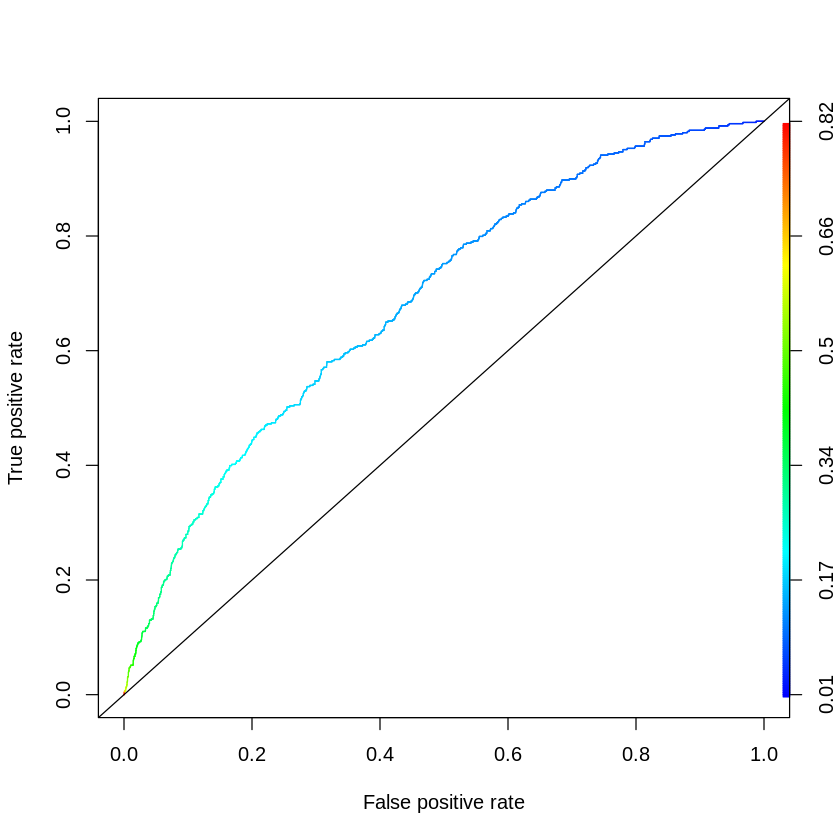

In [41]:
# Your answer for activity 9b goes here..
##predict train ROC curve
plot(perf,colorize=TRUE)
abline(0,1)
as.numeric(performance(ROCR_preds,"auc")@y.values)


[1] 0.6593792

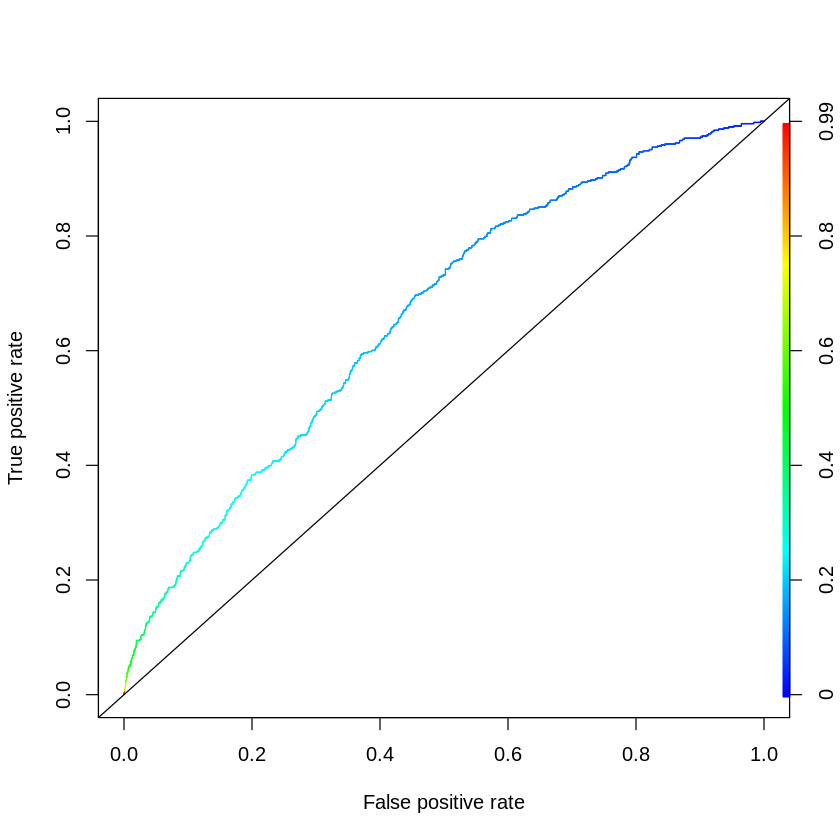

In [35]:
##predict train 1 ROC curve
predicted.risk1 = predict(predict_train1, type = 'response', newdata = test_data)
ROCR_preds1 = prediction(predicted.risk1, test_data$not.fully.paid)
perf1 = performance(ROCR_preds1, 'tpr','fpr')

plot(perf1,colorize=TRUE)
abline(0,1)
as.numeric(performance(ROCR_preds1,"auc")@y.values)


# Save your notebook!